In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

TABULAR_PATH = 'data/tabular/'
data_files = os.listdir(TABULAR_PATH)

In [2]:
def get_info(df):
    info_df = df.describe(include='all').T
    info_df['dtypes'] = df.dtypes
    info_df['missing'] = df.isna().sum()
    return info_df

def plot_top_10s(df):
    df = df[df.columns[1:]]
    num_cols = len(df.columns[1:])

    rows = int(np.ceil(num_cols/3))
    fig, axs = plt.subplots(rows, 3,figsize=(20,10))
    fig.tight_layout()
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.3)

    for column,ax in zip(df.columns[1:],axs.ravel()[:num_cols]):
        df.groupby('PSGC')[column].sum()\
                .sort_values(ascending=True)\
                .tail(10)\
                .plot.barh(ax=ax)
        ax.set_title("Top 10 "+column)
    plt.show()

## Schools Data

In [3]:
schools_data = pd.read_excel(TABULAR_PATH+'Number of schools per brgy.xlsx')
print('schools_data',schools_data.shape)
get_info(schools_data)

schools_data (1570, 7)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
PROV,1570,5,LANAO DEL SUR,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,1570,5,PH153600000,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
CITY/MUNI,1570,117,PARANG,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_CITY/MUNI,1570,118,PH156612000,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
BRGY,1570,1524,Poblacion,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_BRGY,1570,1570,PH157002007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of School,1570,NaN,NaN,NaN,1.72675,1.43918,1,1,1,2,15,int64,0


count    1570.000000
mean        1.726752
std         1.439181
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: Number of School, dtype: float64

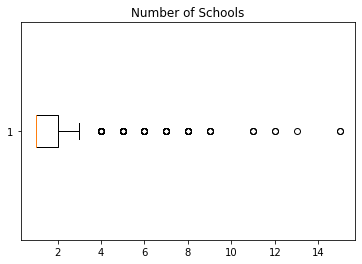

In [4]:
display(schools_data['Number of School'].describe())

plt.boxplot(schools_data['Number of School'].values,vert=False)
plt.title('Number of Schools')
plt.show()

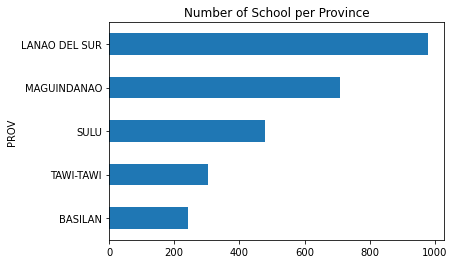

In [5]:
schools_data.groupby('PROV')['Number of School']\
            .sum()\
            .sort_values(ascending=True)\
            .plot.barh()
plt.title("Number of School per Province")
plt.show();

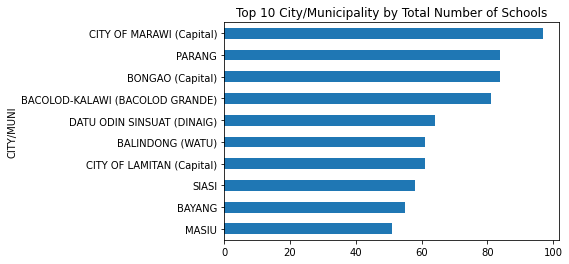

In [6]:
schools_data.groupby('CITY/MUNI')['Number of School']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 City/Municipality by Total Number of Schools")
plt.show();

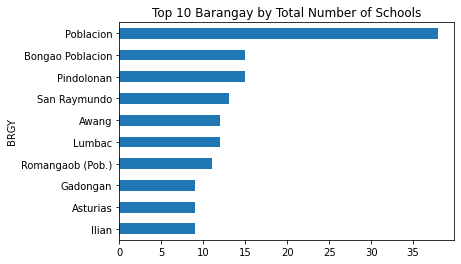

In [7]:
schools_data.groupby('BRGY')['Number of School']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 Barangay by Total Number of Schools")
plt.show();

In [8]:
schools_meta_data = pd.read_excel(TABULAR_PATH+'SchoolsDepEd2017.xlsx')
print('schools_meta_data',schools_meta_data.shape)
get_info(schools_meta_data)

schools_meta_data (2711, 12)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
SCH_ID,2711,NaN,NaN,NaN,203773,113530,100804,133752,134504,217772,800161,int64,0
SCH_NAME,2711,2516,Lumbac PS,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
SCH_CAT,2711,10,ES,1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
SCH_TYPE,2711,5,Public,2398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
LAT,2539,NaN,NaN,NaN,6.87554,0.935225,4.64159,6.05274,7.01048,7.7807,8.09214,float64,172
LONG,2539,NaN,NaN,NaN,123.004,1.74159,118.311,121.144,124.149,124.325,124.958,float64,172
BARANGAY,2711,1534,Poblacion,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
MUNNAME,2711,172,BONGAO (Capital),81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PROV,2711,5,LANAO DEL SUR,978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_MUNI,2711,118,PH153617000,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0


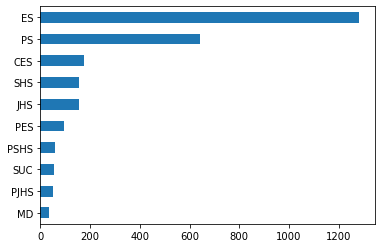

In [9]:
schools_meta_data["SCH_CAT"]\
            .value_counts()\
            .sort_values(ascending=True)\
            .plot.barh()

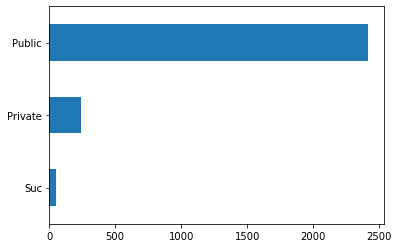

In [10]:
schools_meta_data["SCH_TYPE"]\
            .str.strip().str.title()\
            .value_counts()\
            .sort_values(ascending=True)\
            .plot.barh()

## Population Data

In [11]:
population_data = pd.read_excel(TABULAR_PATH+'Population 2010, 2015 ARMM,BCT.xlsx')
cond = population_data["PSGC_REGI"]=="PH150000000"
population_data = population_data[cond]
print('population_data',population_data.shape)
get_info(population_data)

population_data (2482, 288)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
REGI,2482,1,Autonomous Region In Muslim Mindanao,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_REGI,2482,1,PH150000000,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PROV,2482,5,Lanao Del Sur,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC_PROV,2482,5,PH153600000,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
MuniCities,2482,117,Marawi City,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40-49_hh0_fem,2482,NaN,NaN,NaN,5.28284,7.67591,0,1,3,6,106,float64,0
50-59_hh0_fem,2482,NaN,NaN,NaN,4.56326,7.82694,0,1,2,5,155,float64,0
60-69_hh0_fem,2482,NaN,NaN,NaN,2.92305,5.36467,0,0,1,4,78,float64,0
70-79_hh0_fem,2482,NaN,NaN,NaN,1.17083,2.78922,0,0,0,1,43,float64,0


In [12]:
total_cols = ['Pop2015']+[col for col in population_data.columns if 'tot_' in col.lower()]
get_info(population_data[total_cols])

,count,mean,std,min,25%,50%,75%,max,dtypes,missing
Pop2015,2482.0,1518.891620,1756.143183,132.0,684.0,1046.5,1790.50,36650.0,int64,0
Tot_sin_age_bot,2482.0,1581.473006,2151.108862,132.0,684.0,1046.5,1793.00,36650.0,float64,0
tot_sin_age_mal,2482.0,788.842869,1079.630559,60.0,335.0,517.5,893.00,18279.0,float64,0
tot_sin_age_fem,2482.0,792.630137,1073.611894,72.0,345.0,524.0,883.75,18371.0,float64,0


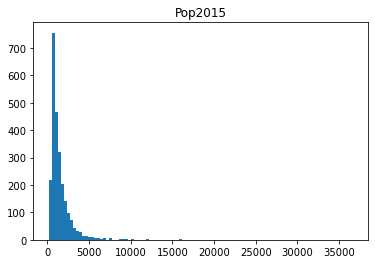

In [13]:
plt.hist(population_data['Pop2015'].values,bins=100)
plt.title('Pop2015')
plt.show();

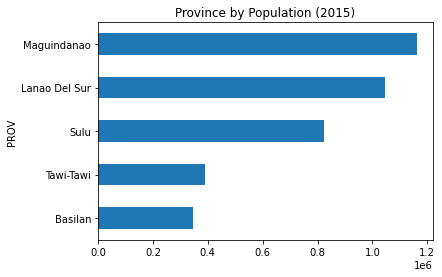

In [14]:
population_data.groupby('PROV')['Pop2015']\
            .sum()\
            .sort_values(ascending=True)\
            .plot.barh()
plt.title("Province by Population (2015)")
plt.show();

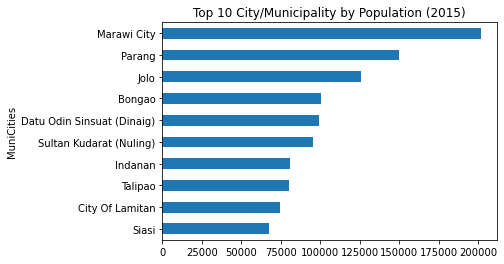

In [15]:
population_data.groupby('MuniCities')['Pop2015']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 City/Municipality by Population (2015)")
plt.show();

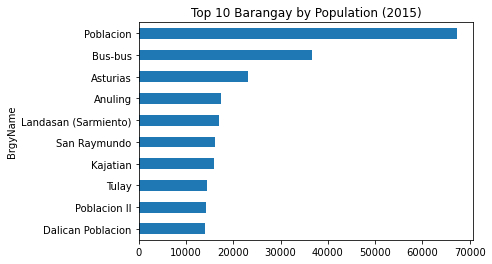

In [16]:
population_data.groupby('BrgyName')['Pop2015']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 Barangay by Population (2015)")
plt.show();

## SDG-related Data

In [17]:
school_popn_files = ['Population 2010, 2015 ARMM,BCT.xlsx','Number of schools per brgy.xlsx','SchoolsDepEd2017.xlsx']
sdg_files = [file for file in data_files if file not in school_popn_files]
sdgs_data = []
for file in sdg_files:
    sdgs_data.append(pd.read_excel(TABULAR_PATH+file))
len(sdgs_data)

3

Main Source of Water Supply for Cooking (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of Households,Own use faucet community water system,Shared faucet community water system,Own use tubed/piped deep well,Shared tubed/\npiped deep well,Tubed/\npiped shallow well,Dug well,Protected spring,Unprotected spring,Lake river rain and others,Peddler,Bottled water,Others
0,Arco,PH150702001,160,8,67,6,1,0,10,68,0,0,0,0,0
1,Ba-as,PH150702002,231,11,2,0,218,0,0,0,0,0,0,0,0
2,Baimbing,PH150702004,101,4,11,4,45,2,20,2,1,12,0,0,0
3,Balagtasan,PH150702005,434,45,313,15,60,0,0,0,0,1,0,0,0
4,Balas,PH150702006,546,3,9,6,201,315,5,0,0,3,0,3,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH157002007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of Households,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Own use faucet community water system,2490,NaN,NaN,NaN,28.8936,122.971,0,0,1,6,2393,int64,0
Shared faucet community water system,2490,NaN,NaN,NaN,33.8667,107.547,0,0,1,14.75,2545,int64,0
Own use tubed/piped deep well,2490,NaN,NaN,NaN,17.3357,56.2982,0,0,0,6,1151,int64,0
Shared tubed/\npiped deep well,2490,NaN,NaN,NaN,43.0996,100.27,0,0,1,36,1954,int64,0
Tubed/\npiped shallow well,2490,NaN,NaN,NaN,7.53655,34.0332,0,0,0,1,710,int64,0
Dug well,2490,NaN,NaN,NaN,53.5622,109.747,0,0,1,56,1193,int64,0
Protected spring,2490,NaN,NaN,NaN,14.8827,49.748,0,0,0,1,602,int64,0


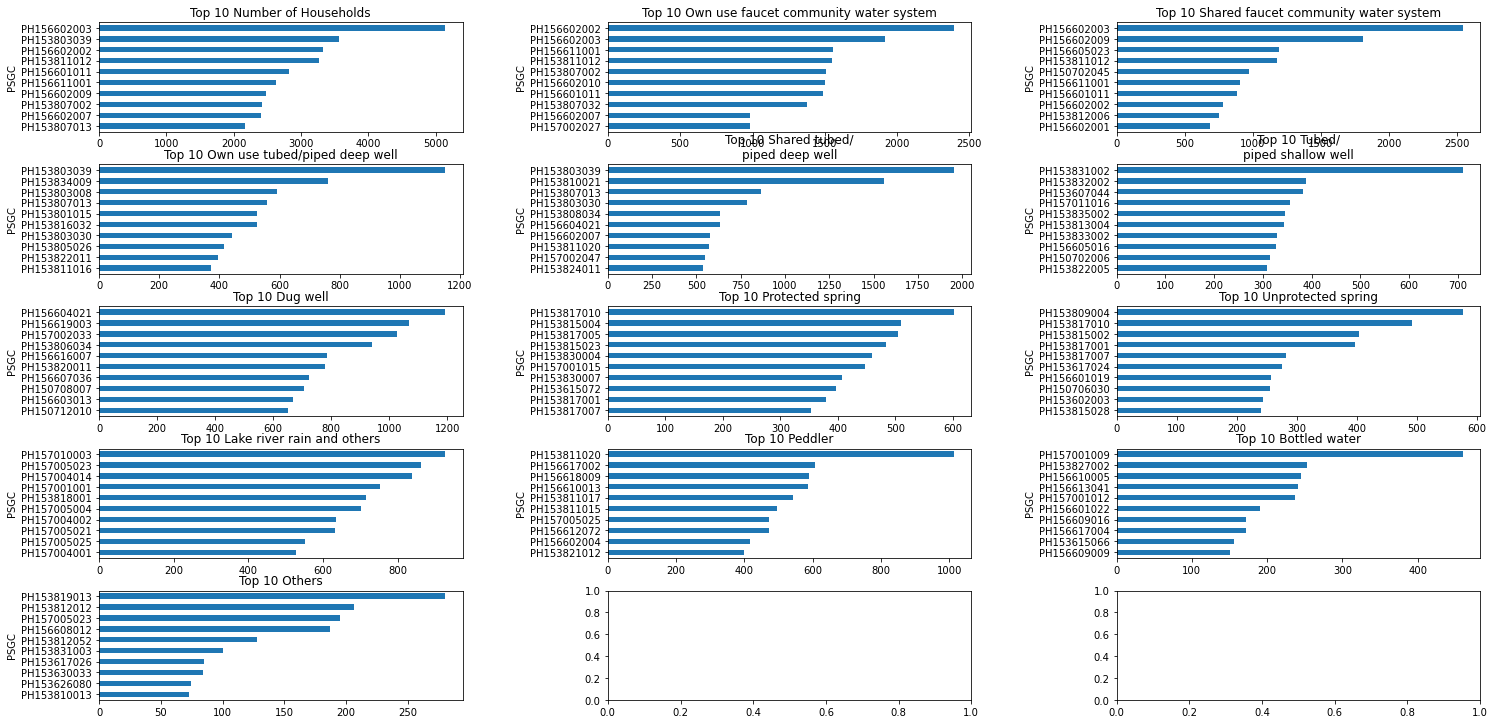

Main Source of Water Supply for Drinking (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of Households,Own use faucet community water system,Shared faucet community water system,Own use tubed/piped deep well,Shared tubed/piped deep well,Tubed/piped shallow well,Dug well,Protected spring,Unprotected spring,"Lake, river, rain and others",Peddler,Bottled water,Others
0,Arco,PH150702001,160,8,67,6,1,0,10,68,0,0,0,0,0
1,Ba-as,PH150702002,231,12,2,0,215,0,0,2,0,0,0,0,0
2,Baimbing,PH150702004,101,2,14,4,48,0,21,0,0,12,0,0,0
3,Balagtasan,PH150702005,434,43,317,13,59,0,0,0,0,2,0,0,0
4,Balas,PH150702006,546,1,7,3,207,292,5,0,0,2,0,24,5


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH157002007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of Households,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Own use faucet community water system,2490,NaN,NaN,NaN,28.0245,118.552,0,0,1,6,2366,int64,0
Shared faucet community water system,2490,NaN,NaN,NaN,33.4137,105.216,0,0,1,15,2534,int64,0
Own use tubed/piped deep well,2490,NaN,NaN,NaN,17.1944,53.5829,0,0,0,6,1022,int64,0
Shared tubed/piped deep well,2490,NaN,NaN,NaN,43.6313,100.61,0,0,1,37,1904,int64,0
Tubed/piped shallow well,2490,NaN,NaN,NaN,7.02731,32.5633,0,0,0,1,702,int64,0
Dug well,2490,NaN,NaN,NaN,49.7803,103.898,0,0,1,47,1189,int64,0
Protected spring,2490,NaN,NaN,NaN,15.5667,50.9785,0,0,0,1,577,int64,0


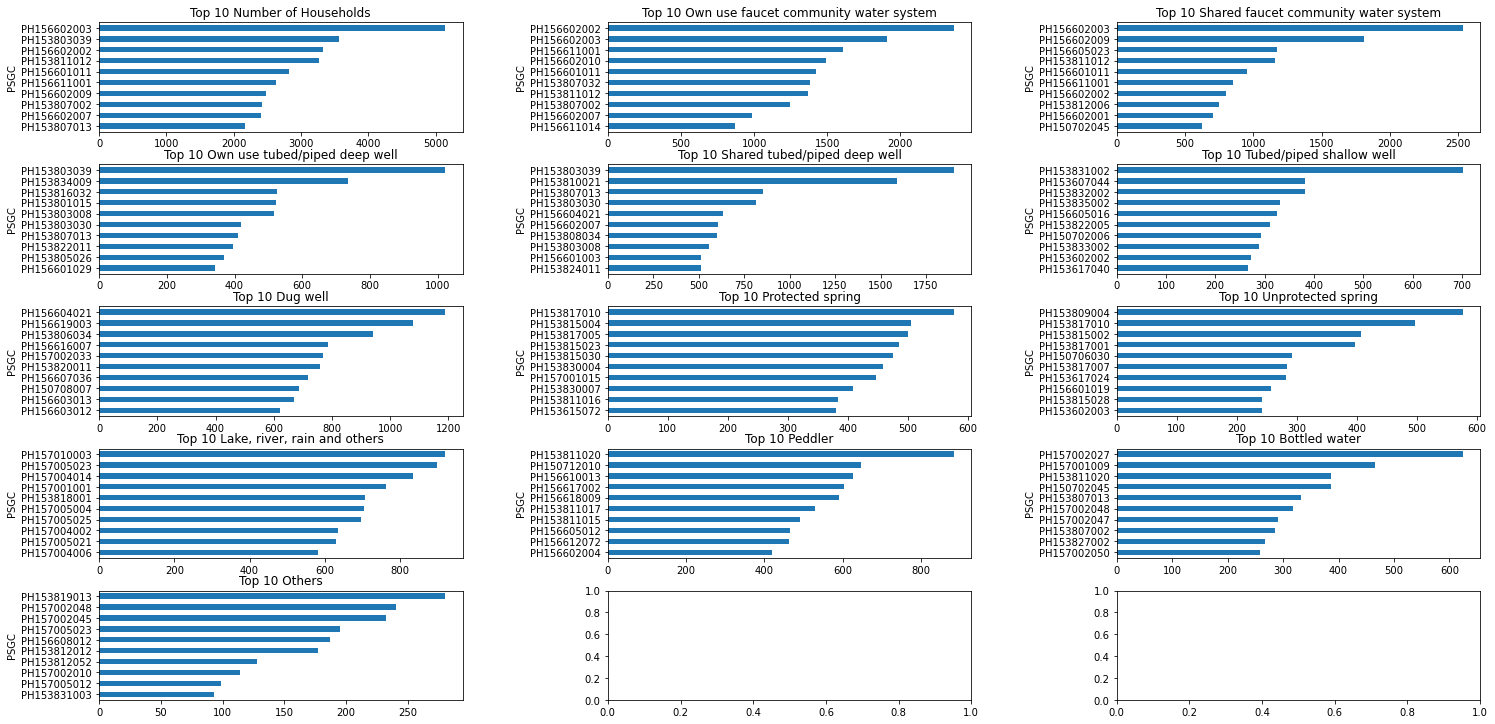

Number of Households by Kind of Fuel for Lighting (ARMM 2015) Brgy.xlsx


,BRGY,PSGC,Number of HH,Electricity,Kerosene (Gaas),Liquified Petroleum Gas (LPG),Oil (vegetable animal and others),Solar panel,Solar lamp,Others,None,Not Reported
0,Arco,PH150702001,160,105,55,0,0,0,0,0,0,0
1,Ba-as,PH150702002,231,183,48,0,0,0,0,0,0,0
2,Baimbing,PH150702004,101,40,60,0,0,0,0,0,1,0
3,Balagtasan,PH150702005,434,378,55,0,0,1,0,0,0,0
4,Balas,PH150702006,546,393,129,1,0,0,1,22,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
BRGY,2490,2082,Pindolonan,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
PSGC,2490,2490,PH157002007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
Number of HH,2490,NaN,NaN,NaN,249.151,283.348,24,106,171,298.75,5144,int64,0
Electricity,2490,NaN,NaN,NaN,131.256,252.446,0,3,72,152,4657,int64,0
Kerosene (Gaas),2490,NaN,NaN,NaN,45.8639,85.3421,0,0,5,54,1053,int64,0
Liquified Petroleum Gas (LPG),2490,NaN,NaN,NaN,1.63293,12.0202,0,0,0,0,249,int64,0
Oil (vegetable animal and others),2490,NaN,NaN,NaN,0.480723,6.50091,0,0,0,0,273,int64,0
Solar panel,2490,NaN,NaN,NaN,28.2024,59.9402,0,0,1,28.75,633,int64,0
Solar lamp,2490,NaN,NaN,NaN,40.4948,74.6191,0,0,4,48,717,int64,0
Others,2490,NaN,NaN,NaN,0.500402,3.96563,0,0,0,0,90,int64,0


In [ ]:
for df,name in zip(sdgs_data,sdg_files):
    print(name)
    display(df.head())
    with pd.option_context('display.max_rows', None): 
        display(get_info(df))
    plot_top_10s(df)